In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [2]:
DATA_IN_PATH = './data_in/'
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'txt' in file:
        print(file.ljust(30)+str(round(os.path.getsize(DATA_IN_PATH+file)/1000000,2)) + "MB")

파일 크기 : 
ratings.txt                   19.52MB
ratings_test.txt              4.89MB
ratings_train.txt             14.63MB


파일 크기 확인 결과 ratings.txt 의 파일 크기가 가장 크고,  3: 1 비율로 train, test 가 나눠진것을 알 수 있다.

In [3]:
train_data = pd.read_csv(DATA_IN_PATH + 'ratings_train.txt', header=0, delimiter='\t', quoting=3)
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


## 데이터 분석

In [4]:
print("전체 학습 데이터의 개수 : {}".format(len(train_data)))

전체 학습 데이터의 개수 : 150000


In [5]:
# 각 데이터에 대한 리뷰의 길이 확인
train_length = train_data['document'].astype(str).apply(len)
train_length.head()

0    19
1    33
2    17
3    29
4    61
Name: document, dtype: int64

<ipython-input-6-220716dead08>:3: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


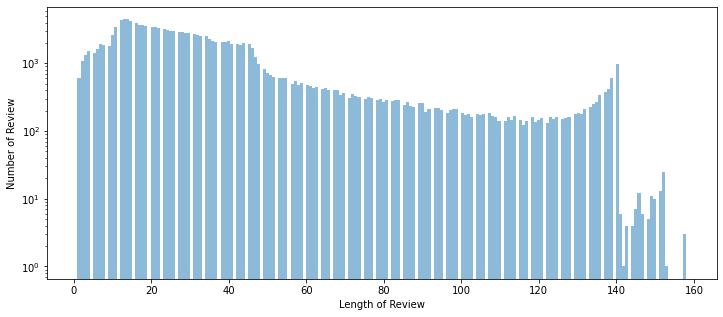

In [6]:
plt.figure(figsize=(12,5))
plt.hist(train_length, bins=200, alpha=0.5, label='word')
plt.yscale('log', nonposy='clip')
plt.xlabel("Length of Review")
plt.ylabel("Number of Review")
plt.show()

In [7]:
x=pd.DataFrame(train_length)
x.describe()

# 리뷰 길이에 대한 데이터 설명

,document
count,150000.000000
mean,35.237493
std,29.582361
min,1.000000
25%,16.000000
50%,27.000000
75%,42.000000
max,158.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1a10db0be20>,
 'caps': [<matplotlib.lines.Line2D at 0x1a10db17520>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a10db0bac0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a10db17be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a10db1f2e0>],
 'means': [<matplotlib.lines.Line2D at 0x1a10db17f40>]}

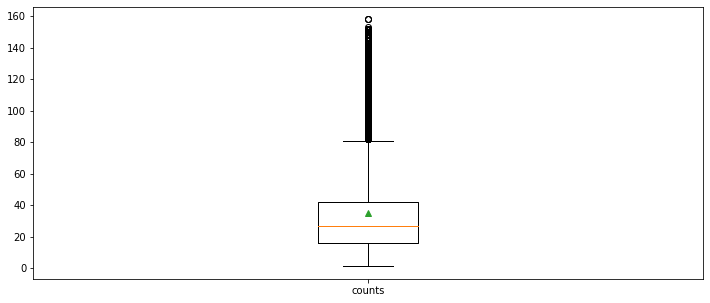

In [8]:
# 박스 플롯 그리기
# plt.boxplot(입력 데이터, labels="입력한 데이터에 대한 라벨", showmeans="평균값을 마크함")
plt.figure(figsize=(12,5))
plt.boxplot(train_length, labels=['counts'], showmeans=True)

In [9]:
train_review = [review for review in train_data['document'] if type(review) is str]

In [10]:
# wordcloud 는 기본적으로 영어에 적용이 되기 때문에 한글 폰트를 다운받아서 적용해줘야 한다.
wordcloud = WordCloud(font_path=DATA_IN_PATH + "NanumGothic.ttf").generate(' '.join(train_review))

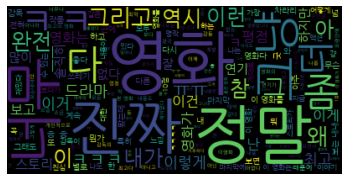

In [11]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

C:\Users\gachon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


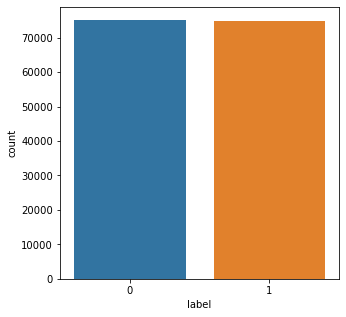

In [12]:
f, ax = plt.subplots(1,1, figsize=(5,5))
sns.countplot(train_data['label'], ax=ax)
plt.show()

In [13]:
print("긍정 개수 리뷰 : {}".format(train_data['label'].value_counts()[1]))
print("부정 개수 리뷰 : {}".format(train_data['label'].value_counts()[0]))

긍정 개수 리뷰 : 74827
부정 개수 리뷰 : 75173


<ipython-input-14-393247599b1b>:7: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


Text(0, 0.5, 'Number of reviews')

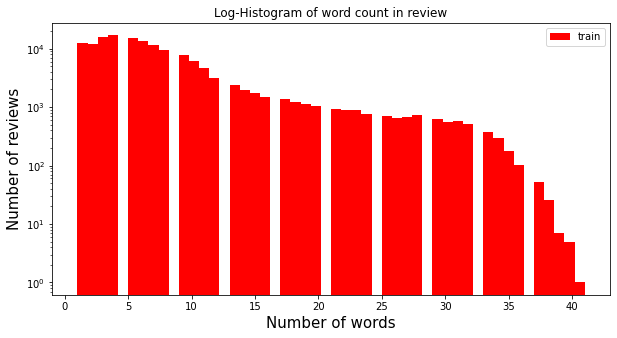

In [14]:
# 각 리뷰의 단어 수 확인하기
train_word_counts=train_data['document'].astype(str).apply(lambda x : len(x.split(' ')))

plt.figure(figsize=(10,5))
plt.hist(train_word_counts, bins=50, facecolor='r', label='train')
plt.title("Log-Histogram of word count in review", fontsize=12)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel("Number of words", fontsize=15)
plt.ylabel("Number of reviews", fontsize=15)

각 리뷰의 단어 개수 밀도 확인

<AxesSubplot:xlabel='document', ylabel='Density'>

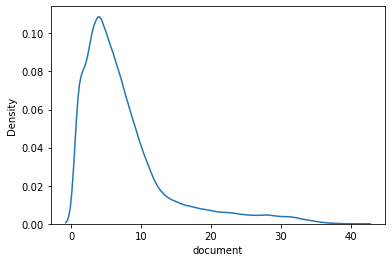

In [15]:
sns.kdeplot(train_word_counts)

In [16]:
x=pd.DataFrame(train_word_counts)
x.describe()

,document
count,150000.000000
mean,7.584940
std,6.514063
min,1.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,41.000000


분석 결과 평균 7~8개 단어, 중간값이 6개 이기 때문에 최대 단어를 7개로 설정해도 무리는 아니다.

이제 특수문자의 유무를 확인하자

In [17]:
qmarks = np.mean(train_data['document'].astype(str).apply(lambda x: '?' in x)) 
exclamation = np.mean(train_data['document'].astype(str).apply(lambda x: '!' in x)) 
fullstop=np.mean(train_data['document'].astype(str).apply(lambda x : '.' in x))

print("물음표가 있는 질문 {:.2f}%".format(qmarks*100))
print("느낌표가 있는 질문 {:.2f}%".format(exclamation*100))
print("마침가 있는 질문 {:.2f}%".format(fullstop*100))

물음표가 있는 질문 8.25%
느낌표가 있는 질문 9.38%
마침가 있는 질문 51.76%


## 데이터 전처리

No module named jpype 인 경우

conda install -c conda-forge jpype1 로 설치하자

In [18]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

import re
import json
from konlpy.tag import Okt
import tensorflow as tf

DATA_IN_PATH = './data_in/'

train_data = pd.read_csv(DATA_IN_PATH+"ratings_train.txt", header=0, delimiter='\t', quoting=3)

In [19]:
train_data['document'][:5]

0                                  아 더빙.. 진짜 짜증나네요 목소리
1                    흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                        교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
Name: document, dtype: object

특수문자 및 숫자 제거하기

In [20]:
review_text= re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]","", train_data['document'][0])
review_text

'아 더빙 진짜 짜증나네요 목소리'

불용어 제거하기
- 문장 단어로 나누기 (KoNLPy의 okt객체 활용)

In [21]:
okt=Okt()
review_text = okt.morphs(review_text, stem=True)
print(review_text)

['아', '더빙', '진짜', '짜증나다', '목소리']


형태소 분석기를 사용하여 문장이 각 단어로 나눠진 것을 확인할 수 있다.

한글은 불용어가 정의된 라이브러리가 없어, 따로 사전을 만들어야한다.

In [22]:
stop_words = set(['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한'])
clean_review = [w for w in review_text if not w in stop_words]
clean_review

['더빙', '진짜', '짜증나다', '목소리']

#### 전체 전처리 과정 함수 처리

In [23]:
def preprocessing(review, okt, remove_stopwords=False, stop_words=[]):
    # review : 전처리할 텍스트
    # okt : okt 객체를 반복적으로 생성하지 않고 미리 생성하여 인자로 받는다.
    # remove_stopword : 불용어를 제거할지 여부 선택
    # stop_word : 불용어 사전
    
    # 1 . 한글 및 공백 문자 모두 제거
    review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]","",review)
    
    # 2. okt 객체를 활용해 형태소 단위로 나눈다
    word_review = okt.morphs(review_text, stem=True)
    
    if remove_stopwords:
        # 불용어 제거
        word_review = [w for w in word_review if not w in stop_words]
    return word_review

In [24]:
stop_words = set(['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한'])
okt=Okt()
clean_train_review=[]

for review in train_data['document']:
    # 비어있는 데이터에서 멈추지 않도록, 문자열인 경우에만 진행한다
    if type(review) == str:
        clean_train_review.append(preprocessing(review, okt, remove_stopwords=True, stop_words=stop_words))
    else:
        clean_train_review.append([])
clean_train_review[:4]        

[['더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다'],
 ['교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정']]

해당 리뷰를 인덱스 벡터로 변환하기
- 평가 데이터도 동일하기 때문에 평가 데이터도 실행해준다

In [25]:
test_data = pd.read_csv(DATA_IN_PATH+'ratings_test.txt', header=0, delimiter='\t', quoting=3)
clean_test_review=[]

for review in test_data['document']:
    if type(review) == str:
        clean_test_review.append(preprocessing(review, okt, remove_stopwords=True, stop_words=stop_words))
    else:
        clean_test_review.append([])

학습 데이터와 평가 데이터에 대해 인덱스 벡터로 바꾼 후 패딩 처리!!!
- 텐서플로의 전처리 모듈 사용하는데 토크나이징 객체를 만든 후 학습 데이터만 적용한다.
- 해당 객체를 사용해 두 데이터를 인덱스 벡터로 만든다.
- 해당 데이터들을 패딩처리

### * 주의 *
- cuda, cudnn 은 버전관리에 매우 민감하다 아래와 같이 버전별로 설치할것!!!

Python 3.7: conda install tensorflow-gpu=2.3 tensorflow=2.3=mkl_py37h936c3e2_0

Python 3.8: conda install tensorflow-gpu=2.3 tensorflow=2.3=mkl_py38h1fcfbd6_0

In [31]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer= Tokenizer()

# 토크나이징 객체 생성
tokenizer.fit_on_texts(clean_train_review)

# 해당 객체로 인덱스 벡터 생성
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

# 단어 사전 형태
word_vocab = tokenizer.word_index

MAX_SEQUENCE_LENGTH=8 # 문장 최대 길이

# 학습 데이터를 벡터화
train_inputs = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
# 학습 데이터의 라벨링
train_labels = np.array(train_data['label'])

# 평가 데이터를 벡터화
test_inputs = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
test_labels = np.array(test_data['label'])

In [32]:
DATA_IN_PATH='./data_in/'
DEFAULT_PATH=''
TRAIN_INPUT_DATA = 'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA = 'nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS= 'data_configs.json'

data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)+1

import os
if not os.path.exists(DEFAULT_PATH +   DATA_IN_PATH):
    os.makedirs(DEFAULT_PATH + DATA_IN_PATH)
    

# 전처리된 학습 데이터를 넘파이 형태로 저장
np.save(open(DEFAULT_PATH  + DATA_IN_PATH + TRAIN_INPUT_DATA,'wb'), train_inputs)
np.save(open(DEFAULT_PATH  + DATA_IN_PATH + TRAIN_LABEL_DATA,'wb'), train_labels)
# 전처리된 평가 데이터를 넘파이 형태로 저장
np.save(open(DEFAULT_PATH + DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DEFAULT_PATH + DATA_IN_PATH + TEST_LABEL_DATA, 'wb'), test_labels)

# 데이터 사전을 json 형태로 저장
json.dump(data_configs, open(DEFAULT_PATH + DATA_IN_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False)

# 모델링

In [43]:
import os
from datetime import datetime
import tensorflow.compat.v1 as tf
import numpy as np
import json
from sklearn.model_selection import train_test_split


DATA_IN_PATH = './data_in/'
DATA_OUT_PATH = './data_out/'
INPUT_TRAIN_DATA_FILE_NAME = 'nsmc_train_input.npy'
LABEL_TRAIN_DATA_FILE_NAME = 'nsmc_train_label.npy'
DATA_CONFIGS_FILE_NAME = 'data_configs.json'


input_data = np.load(open(DATA_IN_PATH + INPUT_TRAIN_DATA_FILE_NAME, 'rb'))
label_data = np.load(open(DATA_IN_PATH + LABEL_TRAIN_DATA_FILE_NAME, 'rb'))
prepro_configs = json.load(open(DATA_IN_PATH + DATA_CONFIGS_FILE_NAME, 'r'))



In [44]:
# 학습과 검증 데이터셋 분리
# 90% 학습, 10% 검증
input_train, input_eval, label_train, label_eval = train_test_split(input_data, label_data, test_size=0.1, random_state=40)


In [112]:
# 데이터 입력 함수
def mapping_fn(X,Y):
    input, label= {'x' : X}, Y
    return input, label

def train_input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((input_train, label_train))
    dataset = dataset.shuffle(buffer_size = len(input_train))
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.map(mapping_fn)
    dataset = dataset.repeat(count = NUM_EPOCHS)
    iterator = dataset.make_one_shot_iterator()
    
    return iterator.get_next()

def eval_input_fn():
    dataset =tf.data.Dataset.from_tensor_slices((input_eval, label_eval))
    dataset = dataset.shuffle(buffer_size = len(input_eval))
    dataset = dataset.batch(16)
    dataset = dataset.map(mapping_fn)
    iterator = dataset.make_one_shot_iterator()
    
    return iterator.get_next()




### 모델 함수 구현
- CNN 모델을 활용한다

In [113]:
def model_fn(features, labels, mode, params):
    TRAIN = mode ==tf.estimator.ModeKeys.TRAIN
    EVAL = mode == tf.estimator.ModeKeys.EVAL
    PREDICT = mode == tf.estimator.ModeKeys.PREDICT
    
    embedding_layer = tf.keras.layers.Embedding(
                    vocab_size,
                    EMB_SIZE)(features['x'])
    dropout_emb = tf.compat.v1.keras.layers.Dropout(rate=0.2)(embedding_layer)
    
    conv = tf.compat.v1.keras.layers.Convolution1D(filters=32,
                                 kernel_size=3,
                                 padding='same',
                                 activation=tf.nn.relu)(dropout_emb)
    
    pool = tf.keras.layers.GlobalMaxPool1D()(conv)
    
    hidden = tf.keras.layers.Dense(units=250, activation=tf.nn.relu)(pool)
    
    dropout_hidden = tf.compat.v1.layers.Dropout(rate=0.2)(hidden)
    
    logits = tf.keras.layers.Dense(units=1)(dropout_hidden)
    
    if labels is not None:
        labels = tf.reshape(labels, [-1,1])
        
    if TRAIN:
        global_step = tf.train.get_global_step()
        loss= tf.losses.sigmoid_cross_entropy(labels,logits)
        train_op = tf.train.AdamOptimizer(0.001).minimize(loss, global_step)
        
        return tf.estimator.EstimatorSpec(mode=mode, train_op = train_op, loss = loss)
    
    elif EVAL:
        loss= tf.losses.sigmoid_cross_entropy(labels,logits)
        pred = tf.nn.sigmoid(logits)
        accuracy=tf.metrics.accuracy(labels, tf.round(pred))
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, eval_metric_ops={'acc':accuracy})
    
    elif PREDICT:
        return tf.estimator.EstimatorSpec(mode = mode,
                                         predictions={
                                             'prob':tf.nn.sigmoid(logits),
                                         }
                                         )

### 하이퍼파라미터 정의

In [114]:
BATCH_SIZE = 16
NUM_EPOCHS = 10
vocab_size = prepro_configs['vocab_size']
EMB_SIZE=128

### 모델 학습

In [115]:
est = tf.estimator.Estimator(model_fn, model_dir='data_out/checkpoint/cnn_model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'data_out/checkpoint/cnn_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [116]:
time_start = datetime.utcnow()
print("Experiment started at {}".format(time_start.strftime("%H:%M:%S")))
print("........................")

est.train(train_input_fn)

time_end=datatime.utcnow()
print("........................")
print("Experiment finished at {}".format(time_end.strftime("%H:%M:%S")))
print("")
time_elapsed = time_end - time_start
print("Experiment elapsed time : {} seconds".format(time_elapsed.total_seconds()))

Experiment started at 13:40:34
........................
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into data_out/checkpoint/cnn_model\model.ckpt.


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc1 in position 157: invalid start byte

In [117]:
valid = est.evaluate(eval_input_fn)

INFO:tensorflow:Could not find trained model in model_dir: data_out/checkpoint/cnn_model, running initialization to evaluate.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-07-20T22:40:40
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 5.09880s
INFO:tensorflow:Finished evaluation at 2021-07-20-22:40:45
INFO:tensorflow:Saving dict for global step 0: acc = 0.5011333, global_step = 0, loss = 0.6929994


### 모델 평가

In [118]:
INPUT_TEST_DATA = 'nsmc_test_input.npy'
LABEL_TEST_DATA = 'nsmc_test_label.npy'

test_input_data = np.load(open(DATA_IN_PATH + INPUT_TEST_DATA, 'rb'))
test_label_data = np.load(open(DATA_IN_PATH + LABEL_TEST_DATA, 'rb'))

In [119]:
def test_input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((test_input_data, test_label_data))
    dataset = dataset.batch(16)
    dataset = dataset.map(mapping_fn)
    iterator = dataset.make_one_shot_iterator()
    
    return iterator.get_next()

In [120]:
predict = est.evaluate(test_input_fn)

INFO:tensorflow:Could not find trained model in model_dir: data_out/checkpoint/cnn_model, running initialization to evaluate.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-07-20T22:43:34
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 5.76176s
INFO:tensorflow:Finished evaluation at 2021-07-20-22:43:40
INFO:tensorflow:Saving dict for global step 0: acc = 0.51912, global_step = 0, loss = 0.6928842
